In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np

np.random.randint(30)

13

In [3]:
path_1 = '/kaggle/input/titanic-machine-learning-from-disaster/train.csv'
path_2 = '/kaggle/input/titanic-machine-learning-from-disaster/test.csv'

train = pd.read_csv(path_1)
test = pd.read_csv(path_2)

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
ytrain = train['Survived']
train = train.drop(['Name','Ticket','PassengerId','Cabin','Survived'], axis = 1)

In [8]:
train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

encoder_ = OrdinalEncoder()
lista = ['Sex', 'Embarked']
train[lista] = encoder_.fit_transform(train[lista])
imputer_ = SimpleImputer(strategy='median')
train[['Age', 'Embarked']] = imputer_.fit_transform(train[['Age', 'Embarked']])


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 48.9 KB


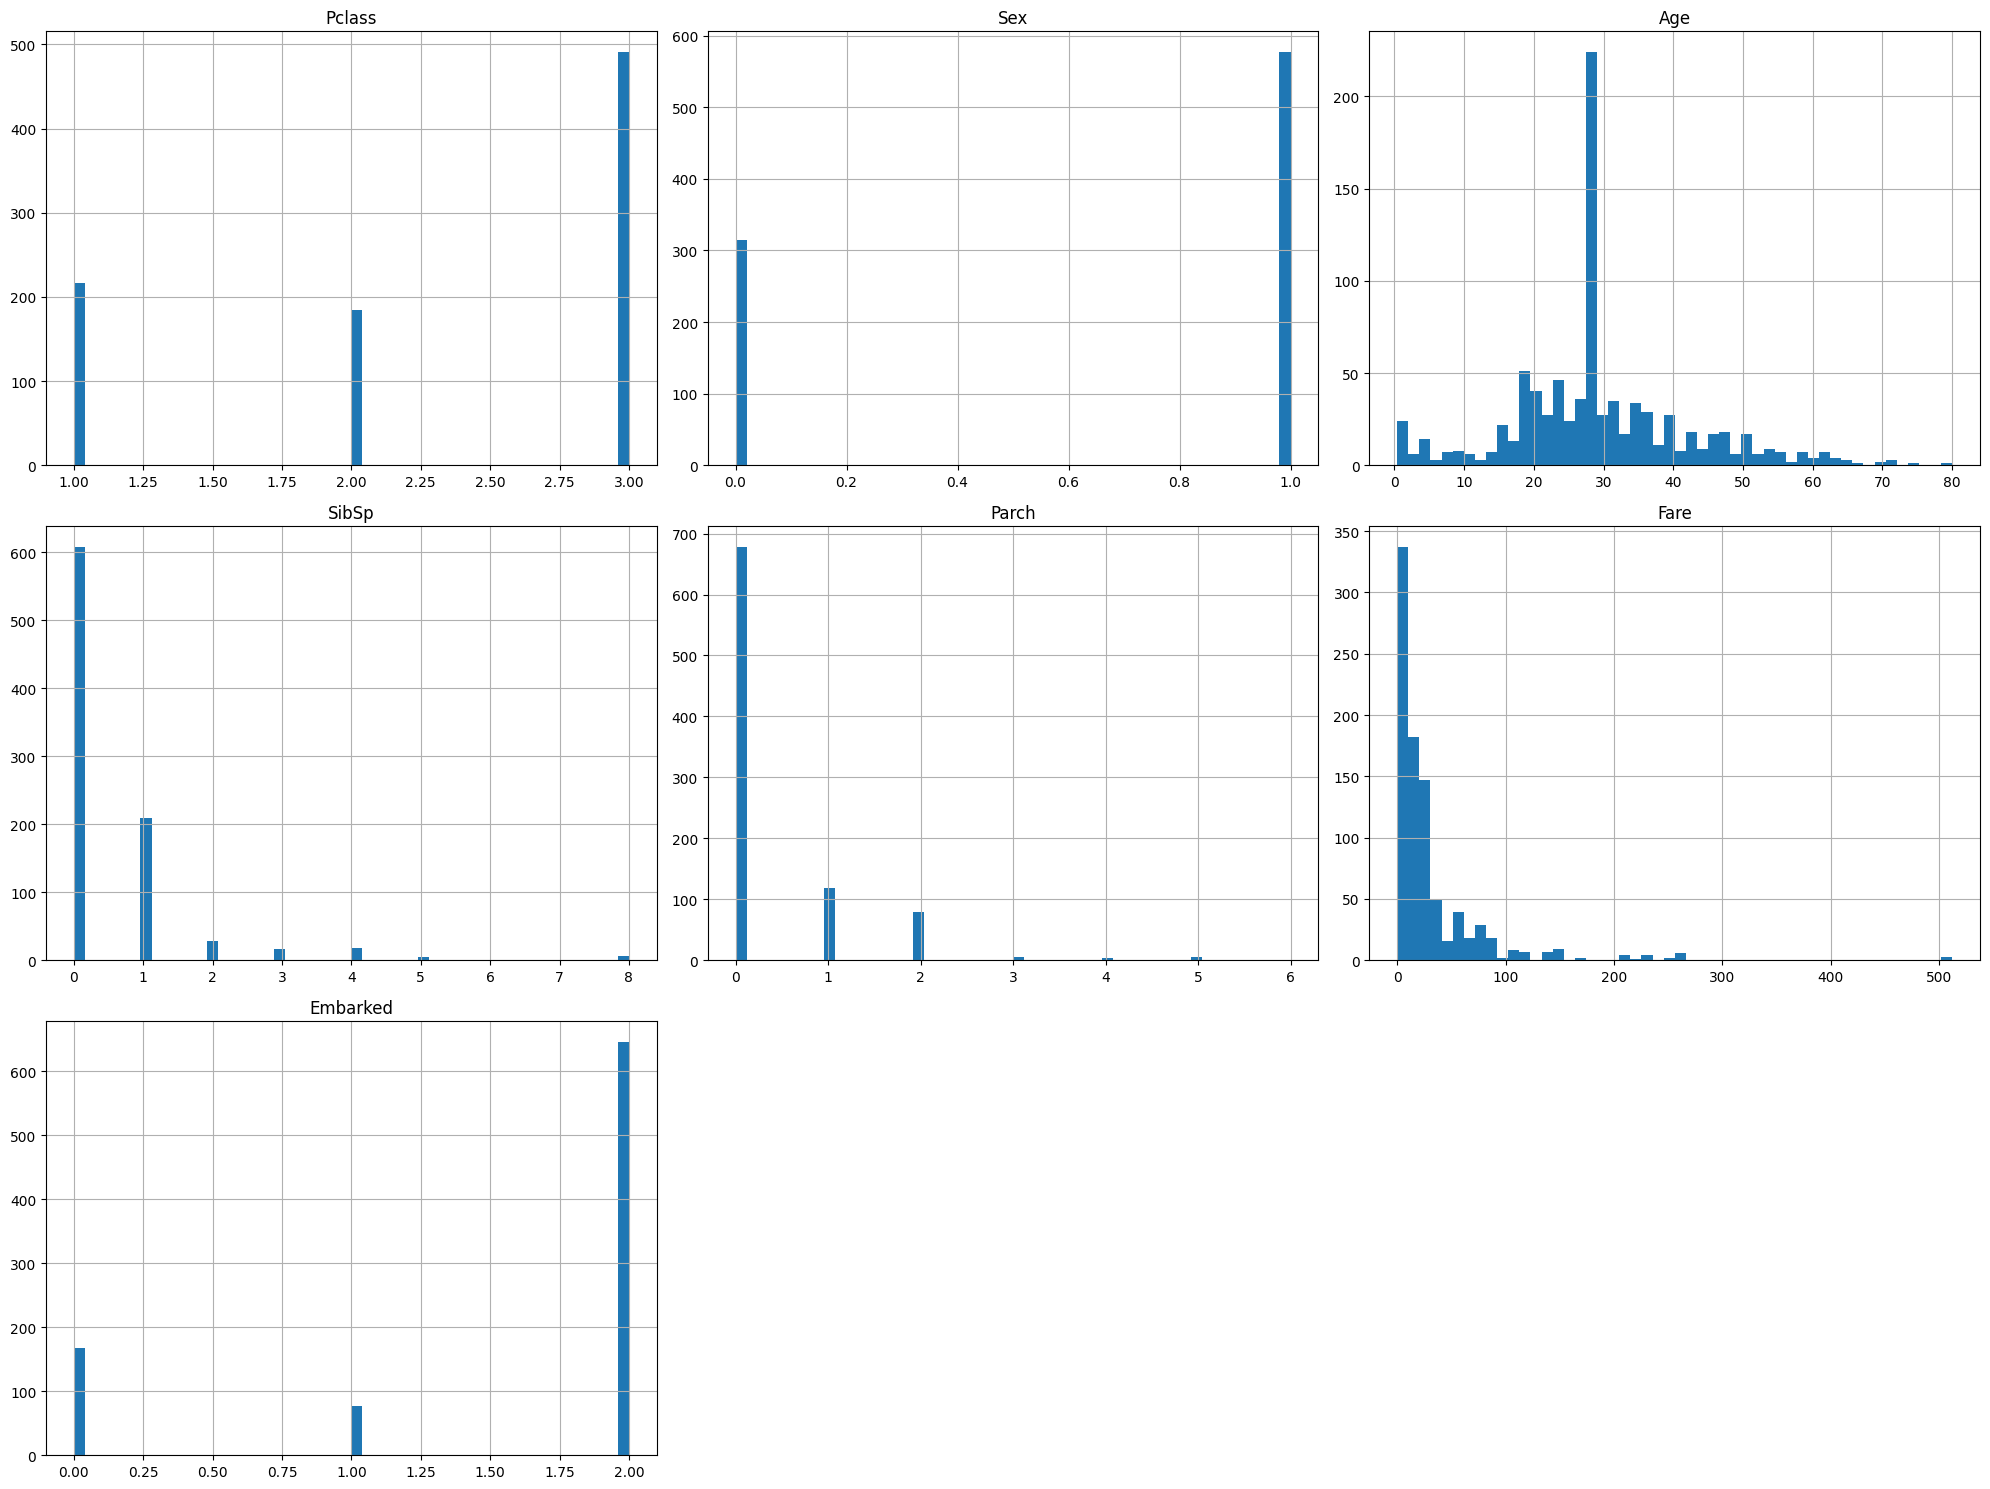

In [11]:
import matplotlib.pyplot as plt

train.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

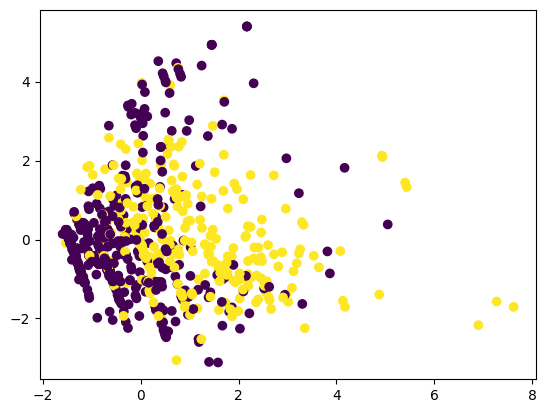

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sca_ = StandardScaler()
red_ = PCA(n_components = 2)
ztrain = red_.fit_transform(sca_.fit_transform(train))
ztrain.shape
plt.scatter(ztrain[:,0],ztrain[:,1], c = ytrain)

In [13]:
from cuml.manifold import UMAP
import time

umap = UMAP(
    n_neighbors=30,
    min_dist=0.2,
    n_component=2,
)
sca_ = StandardScaler()
z = umap.fit_transform(sca_.fit_transform(train))
z = np.asarray(z)
z

[2025-10-27 19:22:32.637] [CUML] [info] Unused keyword parameter: n_component during cuML estimator initialization
[2025-10-27 19:22:32.784] [CUML] [info] Building knn graph using brute force


array([[ 0.08807564,  4.5087314 ],
       [-3.6112843 , -0.81446266],
       [ 3.4156427 , -3.6029463 ],
       ...,
       [ 1.5079908 , -1.3833904 ],
       [-3.2779083 ,  1.5889864 ],
       [ 9.346201  , 13.048531  ]], dtype=float32)

In [14]:
ytrain1 = np.asarray(ytrain)
ytrain1

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

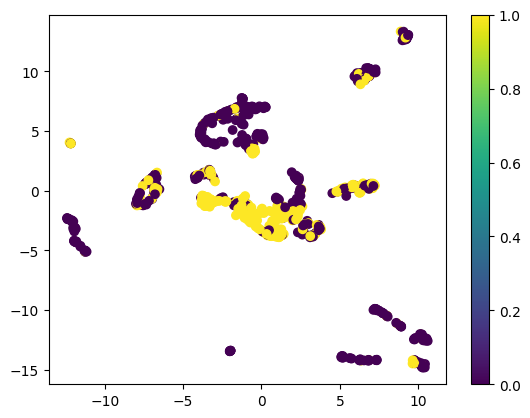

In [15]:
plt.scatter(z[:,0],z[:,1], c=ytrain1)
plt.colorbar()
plt.show()

# Validación cruzada

Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 Mejor combinación encontrada por Grid Search:
{'var_smoothing': 1e-12}
✅ Mejor accuracy promedio: 0.7823

🔁 Validación cruzada (5-fold) con el mejor modelo:
Scores por fold: [0.7598 0.7753 0.7753 0.7921 0.809 ]
✅ Promedio de accuracy: 0.7823
📉 Desviación estándar: 0.0168

📋 Reporte de Clasificación (validación cruzada):
               precision    recall  f1-score   support

No sobrevivió       0.83      0.82      0.82       549
   Sobrevivió       0.71      0.72      0.72       342

     accuracy                           0.78       891
    macro avg       0.77      0.77      0.77       891
 weighted avg       0.78      0.78      0.78       891



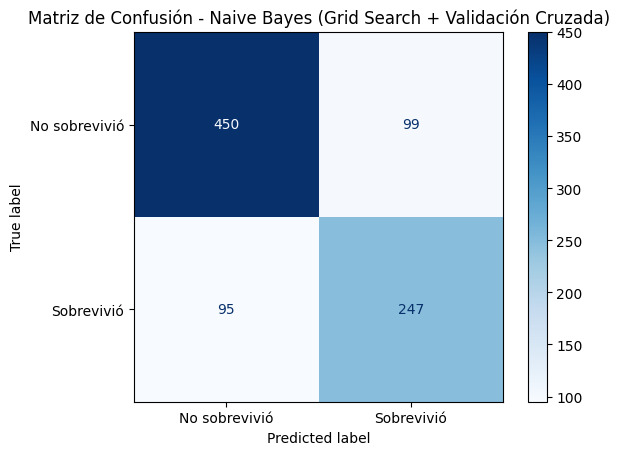

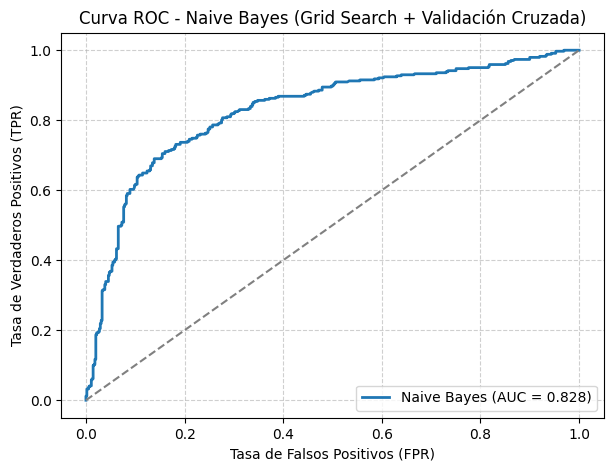

In [16]:
# ======================================================
# 🧠 Clasificador Naive Bayes - Titanic (con Grid Search + Validación cruzada + Curva ROC)
# ======================================================

from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    ConfusionMatrixDisplay, roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# ------------------------------------------------------
# 1️⃣ Escalado de características
# ------------------------------------------------------
sca_ = StandardScaler()
X_scaled = sca_.fit_transform(train)

# ------------------------------------------------------
# 2️⃣ Definición de validación cruzada
# ------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------------------------------
# 3️⃣ Búsqueda en rejilla (Grid Search)
# ------------------------------------------------------
param_grid = {
    'var_smoothing': np.logspace(-12, -6, 20)  # 20 valores entre 1e-12 y 1e-6
}

grid_search = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_scaled, ytrain)

print("🔍 Mejor combinación encontrada por Grid Search:")
print(grid_search.best_params_)
print(f"✅ Mejor accuracy promedio: {grid_search.best_score_:.4f}")

# ------------------------------------------------------
# 4️⃣ Entrenamiento final con el mejor modelo
# ------------------------------------------------------
best_nb = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])

# ------------------------------------------------------
# 5️⃣ Validación cruzada con el mejor modelo
# ------------------------------------------------------
scores = cross_val_score(best_nb, X_scaled, ytrain, cv=cv, scoring='accuracy')
print("\n🔁 Validación cruzada (5-fold) con el mejor modelo:")
print("Scores por fold:", np.round(scores, 4))
print("✅ Promedio de accuracy:", round(np.mean(scores), 4))
print("📉 Desviación estándar:", round(np.std(scores), 4))

# ------------------------------------------------------
# 6️⃣ Predicciones cruzadas para evaluación final
# ------------------------------------------------------
y_pred = cross_val_predict(best_nb, X_scaled, ytrain, cv=cv)
print("\n📋 Reporte de Clasificación (validación cruzada):")
print(classification_report(ytrain, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

# ------------------------------------------------------
# 7️⃣ Matriz de confusión
# ------------------------------------------------------
cm = confusion_matrix(ytrain, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Naive Bayes (Grid Search + Validación Cruzada)")
plt.show()

# ------------------------------------------------------
# 8️⃣ Curva ROC y AUC
# ------------------------------------------------------
y_proba = cross_val_predict(best_nb, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]

fpr, tpr, thresholds = roc_curve(ytrain, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - Naive Bayes (Grid Search + Validación Cruzada)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

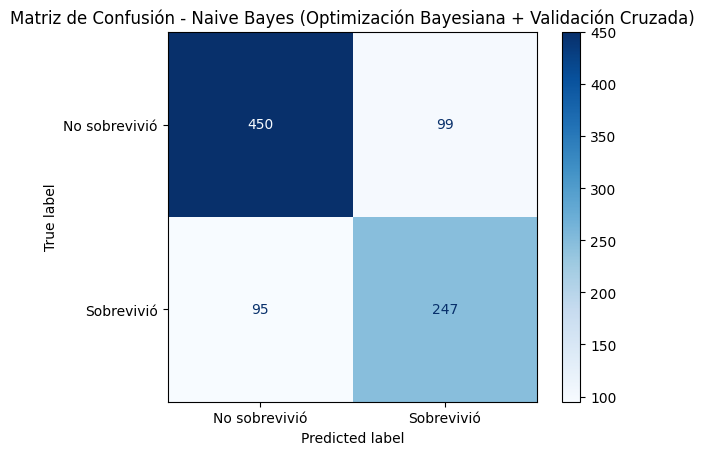

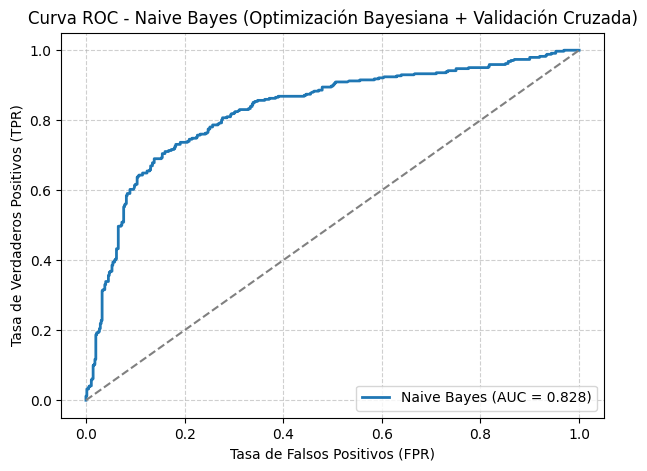

In [17]:
# ======================================================
# 🧠 Clasificador Naive Bayes - Titanic 
# (con Optimización Bayesiana + Validación cruzada + Curva ROC)
# ======================================================

from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    ConfusionMatrixDisplay, roc_curve, auc
)
from skopt import BayesSearchCV
from skopt.space import Real
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# ------------------------------------------------------
# 1️⃣ Escalado de características
# ------------------------------------------------------
sca_ = StandardScaler()
X_scaled = sca_.fit_transform(train)

# ------------------------------------------------------
# 2️⃣ Definición de validación cruzada
# ------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------------------------------
# 3️⃣ Optimización Bayesiana
# ------------------------------------------------------
# Espacio de búsqueda: el hiperparámetro 'var_smoothing' en rango log-uniforme
search_spaces = {'var_smoothing': Real(1e-12, 1e-6, prior='log-uniform')}

bayes_search = BayesSearchCV(
    estimator=GaussianNB(),
    search_spaces=search_spaces,
    cv=cv,
    scoring='accuracy',
    n_iter=25,          # número de iteraciones (puedes aumentar si quieres más precisión)
    n_jobs=-1,
    random_state=42,
    verbose=1
)

bayes_search.fit(X_scaled, ytrain)

print("🌌 Mejor combinación encontrada por Optimización Bayesiana:")
print(bayes_search.best_params_)
print(f"✅ Mejor accuracy promedio: {bayes_search.best_score_:.4f}")

# ------------------------------------------------------
# 4️⃣ Entrenamiento final con el mejor modelo
# ------------------------------------------------------
best_nb = GaussianNB(var_smoothing=bayes_search.best_params_['var_smoothing'])

# ------------------------------------------------------
# 5️⃣ Validación cruzada con el mejor modelo
# ------------------------------------------------------
scores = cross_val_score(best_nb, X_scaled, ytrain, cv=cv, scoring='accuracy')
print("\n🔁 Validación cruzada (5-fold) con el mejor modelo:")
print("Scores por fold:", np.round(scores, 4))
print("✅ Promedio de accuracy:", round(np.mean(scores), 4))
print("📉 Desviación estándar:", round(np.std(scores), 4))

# ------------------------------------------------------
# 6️⃣ Predicciones cruzadas para evaluación final
# ------------------------------------------------------
y_pred = cross_val_predict(best_nb, X_scaled, ytrain, cv=cv)
print("\n📋 Reporte de Clasificación (validación cruzada):")
print(classification_report(ytrain, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

# ------------------------------------------------------
# 7️⃣ Matriz de confusión
# ------------------------------------------------------
cm = confusion_matrix(ytrain, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Naive Bayes (Optimización Bayesiana + Validación Cruzada)")
plt.show()

# ------------------------------------------------------
# 8️⃣ Curva ROC y AUC
# ------------------------------------------------------
y_proba = cross_val_predict(best_nb, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]

fpr, tpr, thresholds = roc_curve(ytrain, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - Naive Bayes (Optimización Bayesiana + Validación Cruzada)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


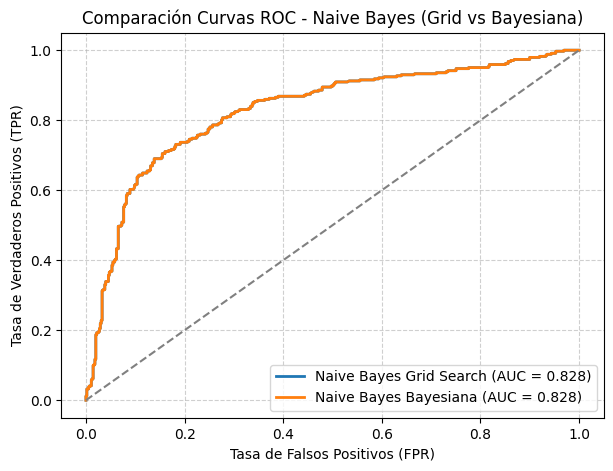

In [18]:
# ======================================================
# ⚔️ Comparación: Naive Bayes Grid Search vs Naive Bayes Bayesiana
# ======================================================

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asegúrate de que estos objetos existan antes de ejecutar:
# grid_search, bayes_search, X_scaled, ytrain, cv

models = {
    "Naive Bayes Grid Search": grid_search.best_estimator_,
    "Naive Bayes Bayesiana": bayes_search.best_estimator_
}

plt.figure(figsize=(7, 5))

for name, model in models.items():
    # Predicción de probabilidades en validación cruzada
    y_proba = cross_val_predict(model, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
    
    # Cálculo de curva ROC
    fpr, tpr, _ = roc_curve(ytrain, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Dibuja cada curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

# Línea diagonal (azar)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Etiquetas y formato
plt.title("Comparación Curvas ROC - Naive Bayes (Grid vs Bayesiana)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


🔍 Mejores hiperparámetros encontrados (Grid Search):
{'reg_param': 0.6000000000000001, 'tol': 0.0001}
✅ Mejor accuracy promedio: 0.8025

🔁 Validación cruzada (5-fold):
Scores por fold: [0.8045 0.7921 0.7865 0.8034 0.8258]
Promedio de accuracy: 0.8025

📋 Reporte de Clasificación (Grid Search):
               precision    recall  f1-score   support

No sobrevivió       0.82      0.87      0.84       549
   Sobrevivió       0.77      0.69      0.73       342

     accuracy                           0.80       891
    macro avg       0.79      0.78      0.79       891
 weighted avg       0.80      0.80      0.80       891



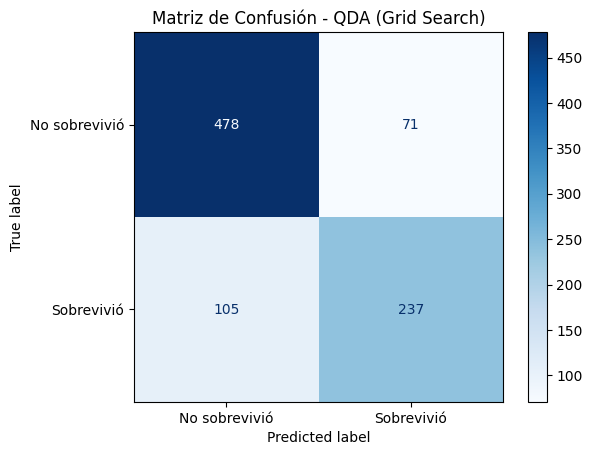

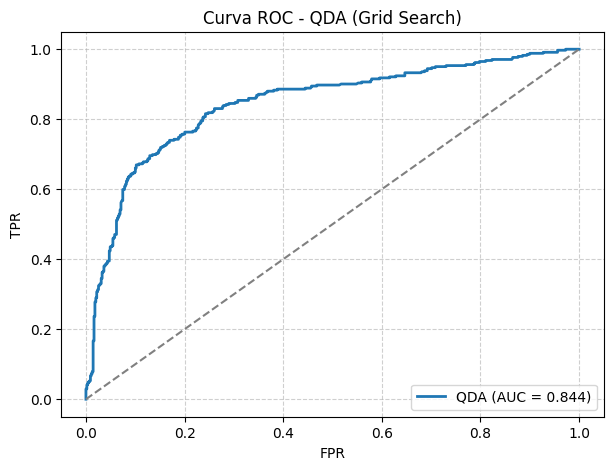

In [19]:
# ======================================================
# 🧠 Clasificador QDA con Grid Search - Titanic
# ======================================================

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay, roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------
# 1️⃣ Escalado de características
# ------------------------------------------------------
sca_ = StandardScaler()
X_scaled = sca_.fit_transform(train)

# ------------------------------------------------------
# 2️⃣ Definición del modelo base
# ------------------------------------------------------
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

# ------------------------------------------------------
# 3️⃣ Definición de la búsqueda de hiperparámetros
# ------------------------------------------------------
param_grid = {
    "reg_param": np.linspace(0, 1, 11),  # Regularización (0 sin regularización)
    "tol": [1e-4, 1e-3, 1e-2, 1e-1]     # Tolerancia para convergencia
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=qda,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_scaled, ytrain)

print("🔍 Mejores hiperparámetros encontrados (Grid Search):")
print(grid_search.best_params_)
print("✅ Mejor accuracy promedio:", round(grid_search.best_score_, 4))

best_qda = grid_search.best_estimator_

# ------------------------------------------------------
# 4️⃣ Evaluación cruzada
# ------------------------------------------------------
scores = cross_val_score(best_qda, X_scaled, ytrain, cv=cv, scoring='accuracy')
print("\n🔁 Validación cruzada (5-fold):")
print("Scores por fold:", np.round(scores, 4))
print("Promedio de accuracy:", round(np.mean(scores), 4))

# ------------------------------------------------------
# 5️⃣ Predicciones cruzadas y reporte
# ------------------------------------------------------
y_pred = cross_val_predict(best_qda, X_scaled, ytrain, cv=cv)
print("\n📋 Reporte de Clasificación (Grid Search):")
print(classification_report(ytrain, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

# ------------------------------------------------------
# 6️⃣ Matriz de confusión
# ------------------------------------------------------
cm = confusion_matrix(ytrain, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - QDA (Grid Search)")
plt.show()

# ------------------------------------------------------
# 7️⃣ Curva ROC y AUC
# ------------------------------------------------------
y_proba = cross_val_predict(best_qda, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(ytrain, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'QDA (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - QDA (Grid Search)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


🔍 Mejores hiperparámetros encontrados (Optimización Bayesiana):
OrderedDict([('reg_param', 0.7548089370938058), ('tol', 1.518140907742565e-05)])
✅ Mejor accuracy promedio: 0.807

🔁 Validación cruzada (5-fold):
Scores por fold: [0.7933 0.7978 0.7978 0.8258 0.8202]
Promedio de accuracy: 0.807

📋 Reporte de Clasificación (Bayesiana):
               precision    recall  f1-score   support

No sobrevivió       0.82      0.88      0.85       549
   Sobrevivió       0.78      0.69      0.73       342

     accuracy                           0.81       891
    macro avg       0.80      0.78      0.79       891
 weighted avg       0.81      0.81      0.80       891



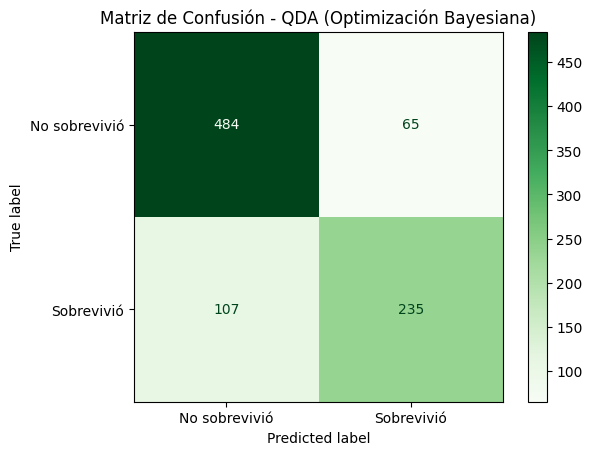

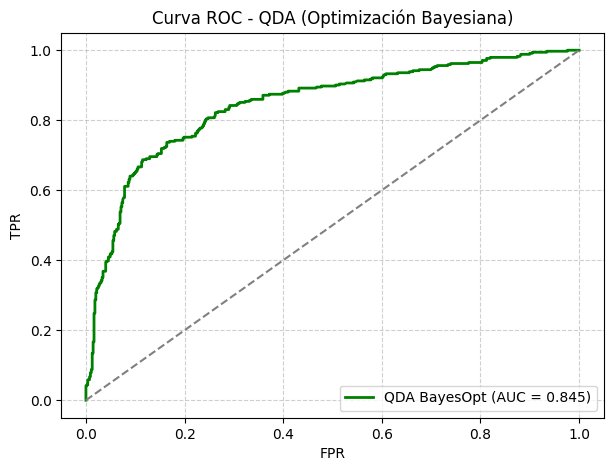

In [20]:
# ======================================================
# 🤖 Clasificador QDA con Optimización Bayesiana - Titanic
# ======================================================

from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay, roc_curve, auc
)
from skopt import BayesSearchCV
from skopt.space import Real
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------
# 1️⃣ Escalado de características
# ------------------------------------------------------
sca_ = StandardScaler()
X_scaled = sca_.fit_transform(train)

# ------------------------------------------------------
# 2️⃣ Definición del modelo base
# ------------------------------------------------------
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------------------------------
# 3️⃣ Espacio de búsqueda bayesiano
# ------------------------------------------------------
search_space = {
    "reg_param": Real(0.0, 1.0, prior='uniform'),
    "tol": Real(1e-5, 1e-1, prior='log-uniform')
}

opt_bayes = BayesSearchCV(
    estimator=qda,
    search_spaces=search_space,
    n_iter=30,               # número de iteraciones de optimización
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

opt_bayes.fit(X_scaled, ytrain)

print("🔍 Mejores hiperparámetros encontrados (Optimización Bayesiana):")
print(opt_bayes.best_params_)
print("✅ Mejor accuracy promedio:", round(opt_bayes.best_score_, 4))

best_qda_bayes = opt_bayes.best_estimator_

# ------------------------------------------------------
# 4️⃣ Evaluación cruzada
# ------------------------------------------------------
scores = cross_val_score(best_qda_bayes, X_scaled, ytrain, cv=cv, scoring='accuracy')
print("\n🔁 Validación cruzada (5-fold):")
print("Scores por fold:", np.round(scores, 4))
print("Promedio de accuracy:", round(np.mean(scores), 4))

# ------------------------------------------------------
# 5️⃣ Reporte de clasificación
# ------------------------------------------------------
y_pred = cross_val_predict(best_qda_bayes, X_scaled, ytrain, cv=cv)
print("\n📋 Reporte de Clasificación (Bayesiana):")
print(classification_report(ytrain, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

# ------------------------------------------------------
# 6️⃣ Matriz de confusión
# ------------------------------------------------------
cm = confusion_matrix(ytrain, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Greens")
plt.title("Matriz de Confusión - QDA (Optimización Bayesiana)")
plt.show()

# ------------------------------------------------------
# 7️⃣ Curva ROC y AUC
# ------------------------------------------------------
y_proba = cross_val_predict(best_qda_bayes, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(ytrain, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'QDA BayesOpt (AUC = {roc_auc:.3f})', linewidth=2, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - QDA (Optimización Bayesiana)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


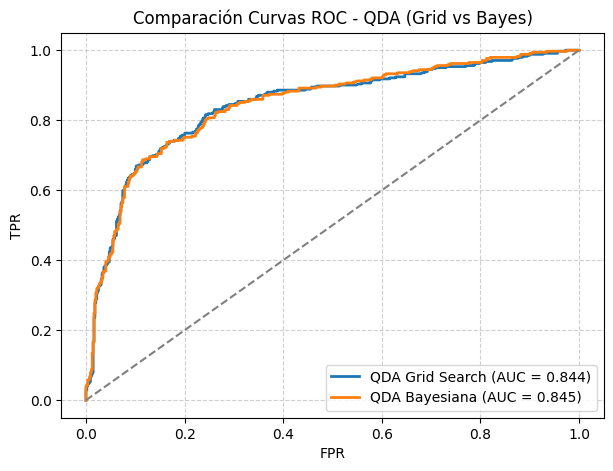

In [21]:
# ======================================================
# ⚔️ Comparación: QDA Grid Search vs QDA Bayesiana
# ======================================================

models = {
    "QDA Grid Search": grid_search.best_estimator_,
    "QDA Bayesiana": opt_bayes.best_estimator_
}

plt.figure(figsize=(7, 5))

for name, model in models.items():
    y_proba = cross_val_predict(model, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(ytrain, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Comparación Curvas ROC - QDA (Grid vs Bayes)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits
🏁 Mejores parámetros encontrados (Grid Search):
{'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
✅ Mejor accuracy promedio: 0.8238

📋 Reporte de Clasificación (validación cruzada):
               precision    recall  f1-score   support

No sobrevivió       0.84      0.89      0.86       549
   Sobrevivió       0.80      0.72      0.76       342

     accuracy                           0.82       891
    macro avg       0.82      0.80      0.81       891
 weighted avg       0.82      0.82      0.82       891



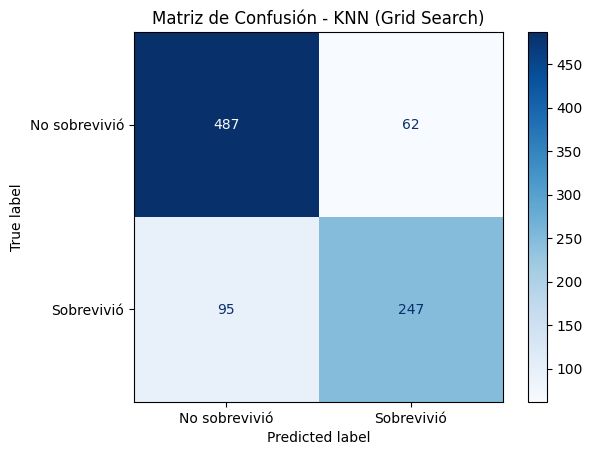

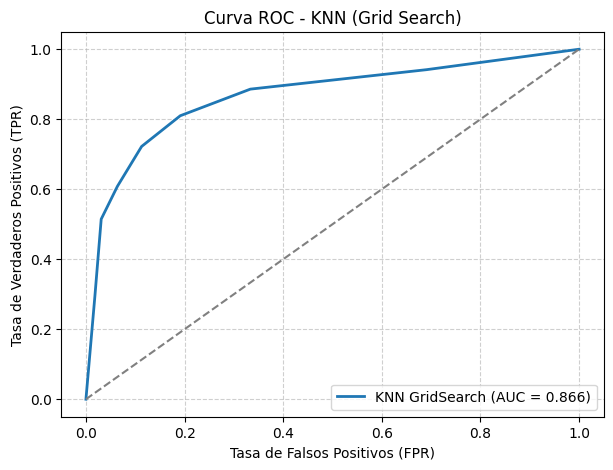

In [22]:
# ======================================================
# 🧠 Clasificador KNN - Titanic (con Grid Search y validación cruzada)
# ======================================================

from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    ConfusionMatrixDisplay, roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------
# 1️⃣ Escalado de características
# ------------------------------------------------------
sca_ = StandardScaler()
X_scaled = sca_.fit_transform(train)

# ------------------------------------------------------
# 2️⃣ Definición del modelo base y validación cruzada
# ------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsClassifier()

# ------------------------------------------------------
# 3️⃣ Definición de la malla de parámetros (Grid Search)
# ------------------------------------------------------
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan', 'euclidean'],
    'p': [1, 2]  # 1=Manhattan, 2=Euclidiana
}

# ------------------------------------------------------
# 4️⃣ Grid Search con validación cruzada
# ------------------------------------------------------
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_scaled, ytrain)
best_knn = grid_search.best_estimator_

print("🏁 Mejores parámetros encontrados (Grid Search):")
print(grid_search.best_params_)
print(f"✅ Mejor accuracy promedio: {grid_search.best_score_:.4f}")

# ------------------------------------------------------
# 5️⃣ Evaluación con los mejores parámetros
# ------------------------------------------------------
y_pred = cross_val_predict(best_knn, X_scaled, ytrain, cv=cv)
print("\n📋 Reporte de Clasificación (validación cruzada):")
print(classification_report(ytrain, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

# Matriz de confusión
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"]).plot(cmap="Blues")
plt.title("Matriz de Confusión - KNN (Grid Search)")
plt.show()

# Curva ROC
y_proba = cross_val_predict(best_knn, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, _ = roc_curve(ytrain, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'KNN GridSearch (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - KNN (Grid Search)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

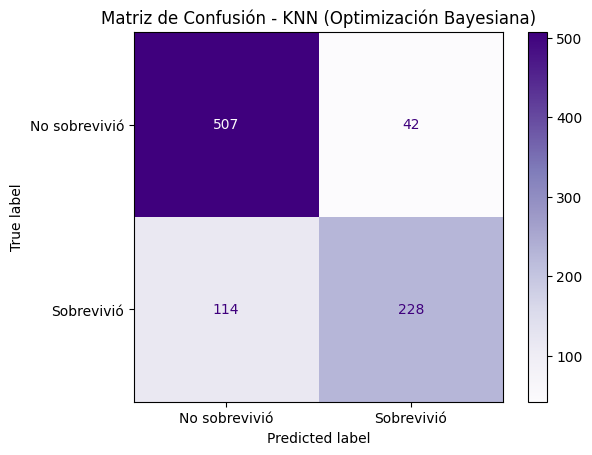

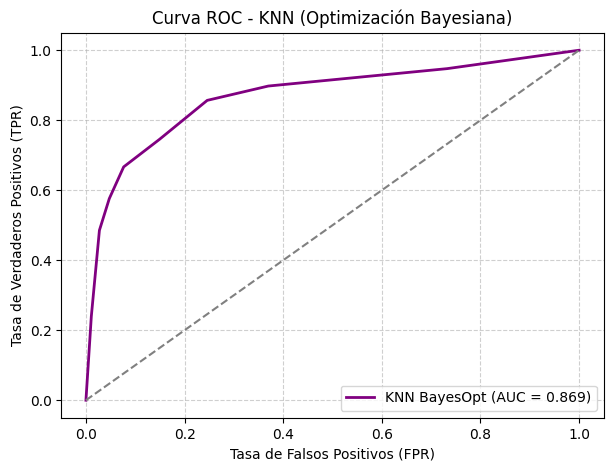

In [23]:
# ======================================================
# 🤖 Clasificador KNN - Titanic (con Optimización Bayesiana)
# ======================================================

from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------
# 1️⃣ Espacio de búsqueda para la optimización
# ------------------------------------------------------
param_space = {
    'n_neighbors': Integer(3, 20),
    'weights': Categorical(['uniform', 'distance']),
    'metric': Categorical(['minkowski', 'manhattan', 'euclidean']),
    'p': Integer(1, 2)
}

# ------------------------------------------------------
# 2️⃣ Configuración de BayesSearchCV
# ------------------------------------------------------
bayes_search = BayesSearchCV(
    estimator=KNeighborsClassifier(),
    search_spaces=param_space,
    n_iter=30,  # número de iteraciones de búsqueda
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

bayes_search.fit(X_scaled, ytrain)
best_bayes_knn = bayes_search.best_estimator_

print("🏁 Mejores parámetros encontrados (Optimización Bayesiana):")
print(bayes_search.best_params_)
print(f"✅ Mejor accuracy promedio: {bayes_search.best_score_:.4f}")

# ------------------------------------------------------
# 3️⃣ Evaluación del mejor modelo
# ------------------------------------------------------
y_pred = cross_val_predict(best_bayes_knn, X_scaled, ytrain, cv=cv)
print("\n📋 Reporte de Clasificación (validación cruzada):")
print(classification_report(ytrain, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

# Matriz de confusión
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"]).plot(cmap="Purples")
plt.title("Matriz de Confusión - KNN (Optimización Bayesiana)")
plt.show()

# Curva ROC
y_proba = cross_val_predict(best_bayes_knn, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, _ = roc_curve(ytrain, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'KNN BayesOpt (AUC = {roc_auc:.3f})', linewidth=2, color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - KNN (Optimización Bayesiana)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


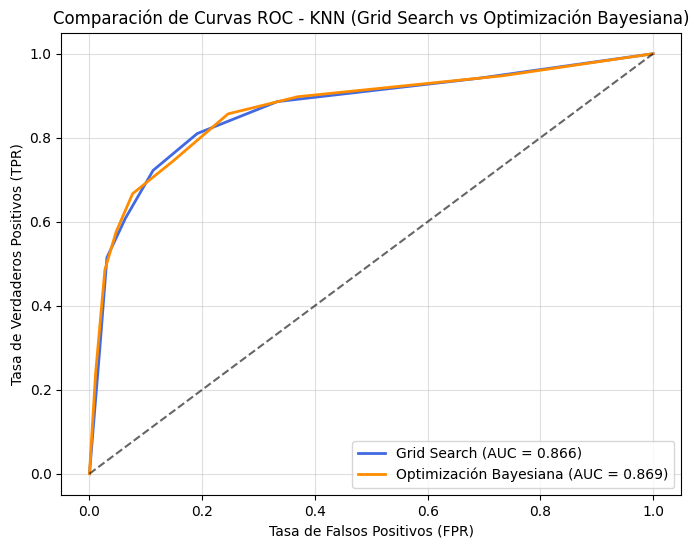

📊 COMPARACIÓN FINAL ENTRE MÉTODOS
Grid Search -> Mejor Accuracy Promedio: 0.8238 | AUC = 0.866
Bayesian Opt -> Mejor Accuracy Promedio: 0.8249 | AUC = 0.869

🏆 La Optimización Bayesiana logró mejor AUC y desempeño general.


In [24]:
# ======================================================
# 📈 Comparación visual de Curvas ROC: Grid Search vs Bayesiana
# ======================================================

# ⚠️ Asegúrate de que ya se hayan ejecutado:
# - grid_search y best_knn (del modelo con Grid Search)
# - bayes_search y best_bayes_knn (del modelo con Optimización Bayesiana)

# Obtener probabilidades predichas con validación cruzada para ambos modelos
y_proba_grid = cross_val_predict(best_knn, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
y_proba_bayes = cross_val_predict(best_bayes_knn, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]

# Calcular FPR, TPR y AUC para ambos
fpr_grid, tpr_grid, _ = roc_curve(ytrain, y_proba_grid)
roc_auc_grid = auc(fpr_grid, tpr_grid)

fpr_bayes, tpr_bayes, _ = roc_curve(ytrain, y_proba_bayes)
roc_auc_bayes = auc(fpr_bayes, tpr_bayes)

# ------------------------------------------------------
# 🎨 Gráfico de comparación
# ------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.plot(fpr_grid, tpr_grid, label=f'Grid Search (AUC = {roc_auc_grid:.3f})', color='royalblue', linewidth=2)
plt.plot(fpr_bayes, tpr_bayes, label=f'Optimización Bayesiana (AUC = {roc_auc_bayes:.3f})', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)

plt.title("Comparación de Curvas ROC - KNN (Grid Search vs Optimización Bayesiana)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

# ------------------------------------------------------
# 🧾 Comparación numérica complementaria
# ------------------------------------------------------
print("==============================================")
print("📊 COMPARACIÓN FINAL ENTRE MÉTODOS")
print("==============================================")
print(f"Grid Search -> Mejor Accuracy Promedio: {grid_search.best_score_:.4f} | AUC = {roc_auc_grid:.3f}")
print(f"Bayesian Opt -> Mejor Accuracy Promedio: {bayes_search.best_score_:.4f} | AUC = {roc_auc_bayes:.3f}")

if roc_auc_bayes > roc_auc_grid:
    print("\n🏆 La Optimización Bayesiana logró mejor AUC y desempeño general.")
else:
    print("\n🏆 El Grid Search obtuvo mejor desempeño o resultados equivalentes.")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
🏁 Mejores parámetros encontrados (Grid Search):
{'C': 0.09999999999999999, 'penalty': 'l2', 'solver': 'lbfgs'}
✅ Mejor accuracy promedio: 0.7969

📋 Reporte de Clasificación (validación cruzada):
               precision    recall  f1-score   support

No sobrevivió       0.82      0.86      0.84       549
   Sobrevivió       0.75      0.70      0.73       342

     accuracy                           0.80       891
    macro avg       0.79      0.78      0.78       891
 weighted avg       0.79      0.80      0.80       891



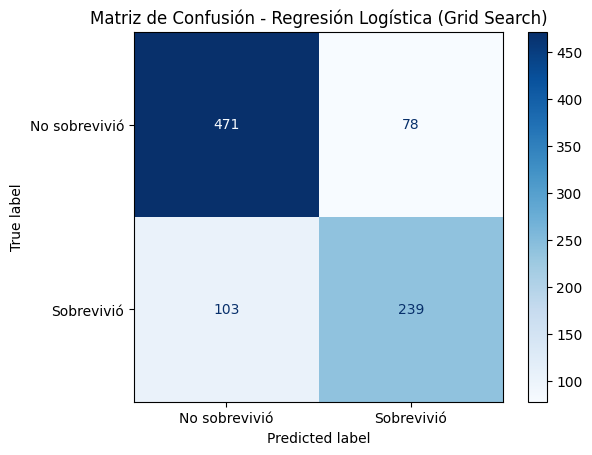

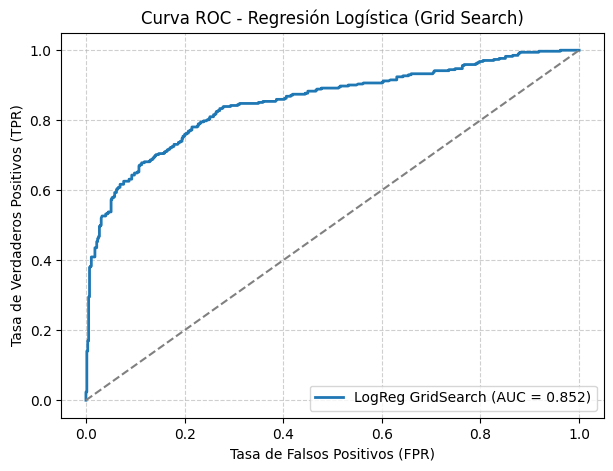

In [25]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay, roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------
# 1️⃣ Escalado de características
# ------------------------------------------------------
sca_ = StandardScaler()
X_scaled = sca_.fit_transform(train)

# ------------------------------------------------------
# 2️⃣ Definición del modelo base y validación cruzada
# ------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_model = LogisticRegression(max_iter=1000, random_state=42)

# ------------------------------------------------------
# 3️⃣ Definición de la malla de parámetros (Grid Search)
# ------------------------------------------------------
param_grid = {
    'C': np.logspace(-3, 3, 10),  # fuerza de regularización
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

# ------------------------------------------------------
# 4️⃣ Grid Search con validación cruzada
# ------------------------------------------------------
grid_search = GridSearchCV(
    estimator=log_model,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_scaled, ytrain)
best_log_grid = grid_search.best_estimator_

print("🏁 Mejores parámetros encontrados (Grid Search):")
print(grid_search.best_params_)
print(f"✅ Mejor accuracy promedio: {grid_search.best_score_:.4f}")

# ------------------------------------------------------
# 5️⃣ Evaluación con los mejores parámetros
# ------------------------------------------------------
y_pred = cross_val_predict(best_log_grid, X_scaled, ytrain, cv=cv)
print("\n📋 Reporte de Clasificación (validación cruzada):")
print(classification_report(ytrain, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

# Matriz de confusión
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"]).plot(cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística (Grid Search)")
plt.show()

# Curva ROC
y_proba = cross_val_predict(best_log_grid, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, _ = roc_curve(ytrain, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'LogReg GridSearch (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - Regresión Logística (Grid Search)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

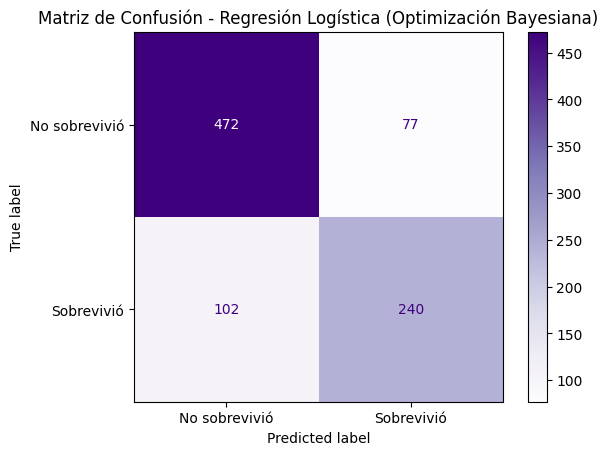

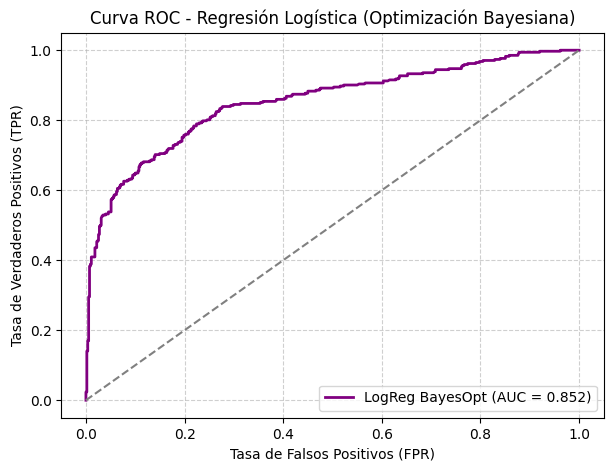

In [26]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------
# 1️⃣ Espacio de búsqueda para la optimización
# ------------------------------------------------------
param_space = {
    'C': Real(1e-3, 1e3, prior='log-uniform'),
    'solver': Categorical(['lbfgs', 'liblinear']),
    'penalty': Categorical(['l2'])
}

# ------------------------------------------------------
# 2️⃣ Configuración de BayesSearchCV
# ------------------------------------------------------
bayes_search = BayesSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    search_spaces=param_space,
    n_iter=25,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
bayes_search.fit(X_scaled, ytrain)
best_bayes_log = bayes_search.best_estimator_

print("🏁 Mejores parámetros encontrados (Optimización Bayesiana):")
print(bayes_search.best_params_)
print(f"✅ Mejor accuracy promedio: {bayes_search.best_score_:.4f}")

# ------------------------------------------------------
# 3️⃣ Evaluación del mejor modelo
# ------------------------------------------------------
y_pred = cross_val_predict(best_bayes_log, X_scaled, ytrain, cv=cv)
print("\n📋 Reporte de Clasificación (validación cruzada):")
print(classification_report(ytrain, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

# Matriz de confusión
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"]).plot(cmap="Purples")
plt.title("Matriz de Confusión - Regresión Logística (Optimización Bayesiana)")
plt.show()

# Curva ROC
y_proba = cross_val_predict(best_bayes_log, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, _ = roc_curve(ytrain, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'LogReg BayesOpt (AUC = {roc_auc:.3f})', linewidth=2, color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - Regresión Logística (Optimización Bayesiana)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


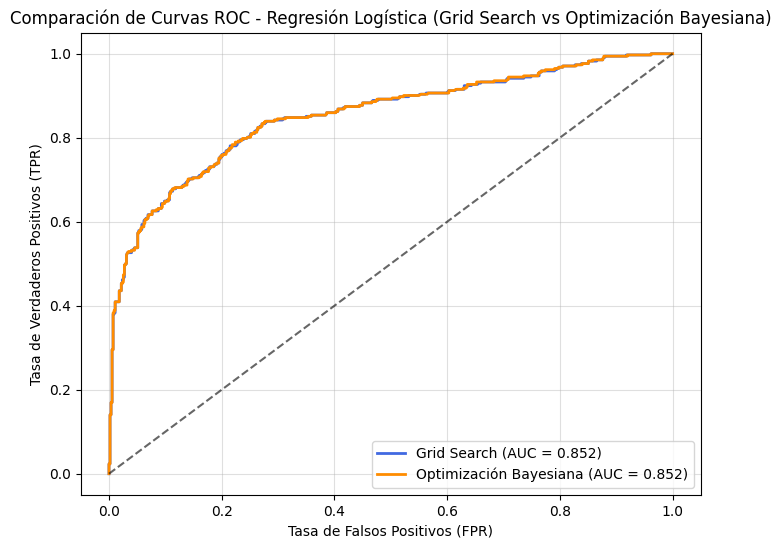

📊 COMPARACIÓN FINAL ENTRE MÉTODOS
Grid Search -> Mejor Accuracy Promedio: 0.7969 | AUC = 0.852
Bayesian Opt -> Mejor Accuracy Promedio: 0.7991 | AUC = 0.852

🏆 La Optimización Bayesiana logró mejor AUC y desempeño general.


In [27]:
# ⚠️ Asegúrate de haber ejecutado antes:
# - grid_search y best_log_grid
# - bayes_search y best_bayes_log

# Obtener probabilidades predichas con validación cruzada para ambos modelos
y_proba_grid = cross_val_predict(best_log_grid, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
y_proba_bayes = cross_val_predict(best_bayes_log, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]

# Calcular FPR, TPR y AUC para ambos
fpr_grid, tpr_grid, _ = roc_curve(ytrain, y_proba_grid)
roc_auc_grid = auc(fpr_grid, tpr_grid)

fpr_bayes, tpr_bayes, _ = roc_curve(ytrain, y_proba_bayes)
roc_auc_bayes = auc(fpr_bayes, tpr_bayes)

# ------------------------------------------------------
# 🎨 Gráfico de comparación
# ------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.plot(fpr_grid, tpr_grid, label=f'Grid Search (AUC = {roc_auc_grid:.3f})', color='royalblue', linewidth=2)
plt.plot(fpr_bayes, tpr_bayes, label=f'Optimización Bayesiana (AUC = {roc_auc_bayes:.3f})', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)

plt.title("Comparación de Curvas ROC - Regresión Logística (Grid Search vs Optimización Bayesiana)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

# ------------------------------------------------------
# 🧾 Comparación numérica complementaria
# ------------------------------------------------------
print("==============================================")
print("📊 COMPARACIÓN FINAL ENTRE MÉTODOS")
print("==============================================")
print(f"Grid Search -> Mejor Accuracy Promedio: {grid_search.best_score_:.4f} | AUC = {roc_auc_grid:.3f}")
print(f"Bayesian Opt -> Mejor Accuracy Promedio: {bayes_search.best_score_:.4f} | AUC = {roc_auc_bayes:.3f}")

if roc_auc_bayes > roc_auc_grid:
    print("\n🏆 La Optimización Bayesiana logró mejor AUC y desempeño general.")
else:
    print("\n🏆 El Grid Search obtuvo mejor desempeño o resultados equivalentes.")


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
🏁 Mejores parámetros (Grid Search):
{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
✅ Mejor accuracy promedio: 0.8317

📋 Reporte de Clasificación:
               precision    recall  f1-score   support

No sobrevivió       0.84      0.90      0.87       549
   Sobrevivió       0.81      0.73      0.77       342

     accuracy                           0.83       891
    macro avg       0.83      0.81      0.82       891
 weighted avg       0.83      0.83      0.83       891



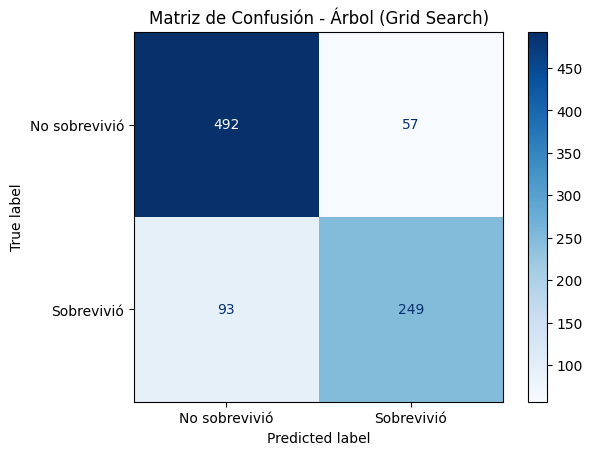

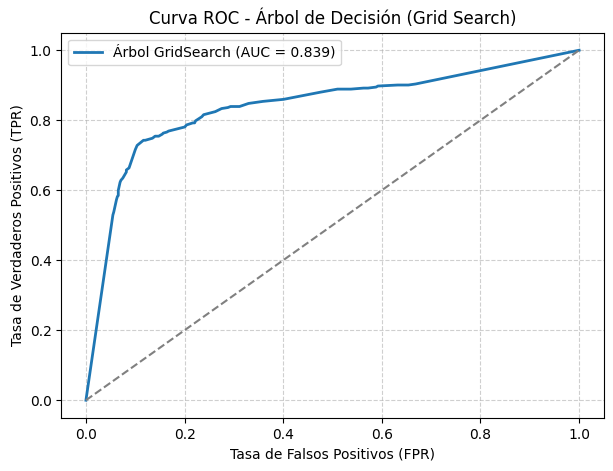

In [28]:
# ======================================================
# 🌳 Clasificador Árbol de Decisión - Titanic (con Grid Search y validación cruzada)
# ======================================================

from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------
# 1️⃣ Escalado
# ------------------------------------------------------
sca_ = StandardScaler()
X_scaled = sca_.fit_transform(train)

# ------------------------------------------------------
# 2️⃣ Definición del modelo base y validación cruzada
# ------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
tree = DecisionTreeClassifier(random_state=42)

# ------------------------------------------------------
# 3️⃣ Malla de parámetros (Grid Search)
# ------------------------------------------------------
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

# ------------------------------------------------------
# 4️⃣ Grid Search
# ------------------------------------------------------
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_scaled, ytrain)
best_tree = grid_search.best_estimator_

print("🏁 Mejores parámetros (Grid Search):")
print(grid_search.best_params_)
print(f"✅ Mejor accuracy promedio: {grid_search.best_score_:.4f}")

# ------------------------------------------------------
# 5️⃣ Evaluación con los mejores parámetros
# ------------------------------------------------------
y_pred = cross_val_predict(best_tree, X_scaled, ytrain, cv=cv)
print("\n📋 Reporte de Clasificación:")
print(classification_report(ytrain, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"]).plot(cmap="Blues")
plt.title("Matriz de Confusión - Árbol (Grid Search)")
plt.show()

# ------------------------------------------------------
# 6️⃣ Curva ROC
# ------------------------------------------------------
y_proba = cross_val_predict(best_tree, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, _ = roc_curve(ytrain, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Árbol GridSearch (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("Curva ROC - Árbol de Decisión (Grid Search)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

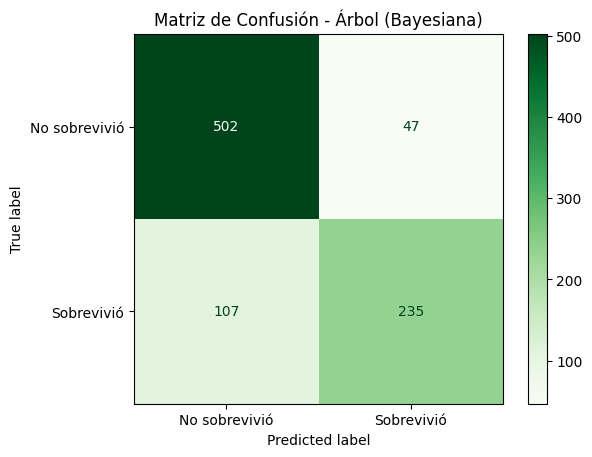

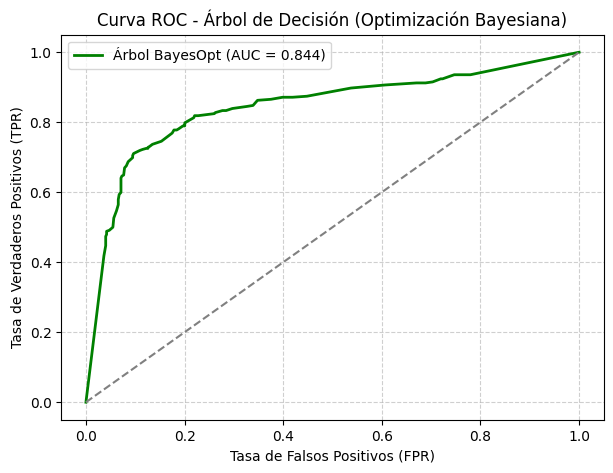

In [29]:
# ======================================================
# 🤖 Clasificador Árbol de Decisión - Titanic (Optimización Bayesiana)
# ======================================================

from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay, 
    roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------
# 1️⃣ Espacio de búsqueda
# ------------------------------------------------------
param_space = {
    'criterion': Categorical(['gini', 'entropy', 'log_loss']),
    'max_depth': Integer(2, 20),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical([None, 'sqrt', 'log2'])
}

# ------------------------------------------------------
# 2️⃣ Configuración de BayesSearchCV
# ------------------------------------------------------
bayes_search = BayesSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    search_spaces=param_space,
    n_iter=30,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

bayes_search.fit(X_scaled, ytrain)
best_bayes_tree = bayes_search.best_estimator_

print("🏁 Mejores parámetros (Optimización Bayesiana):")
print(bayes_search.best_params_)
print(f"✅ Mejor accuracy promedio: {bayes_search.best_score_:.4f}")

# ------------------------------------------------------
# 3️⃣ Evaluación
# ------------------------------------------------------
y_pred = cross_val_predict(best_bayes_tree, X_scaled, ytrain, cv=cv)
print("\n📋 Reporte de Clasificación:")
print(classification_report(ytrain, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"]).plot(cmap="Greens")
plt.title("Matriz de Confusión - Árbol (Bayesiana)")
plt.show()

# ------------------------------------------------------
# 4️⃣ Curva ROC
# ------------------------------------------------------
y_proba = cross_val_predict(best_bayes_tree, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, _ = roc_curve(ytrain, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Árbol BayesOpt (AUC = {roc_auc:.3f})', linewidth=2, color='green')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("Curva ROC - Árbol de Decisión (Optimización Bayesiana)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


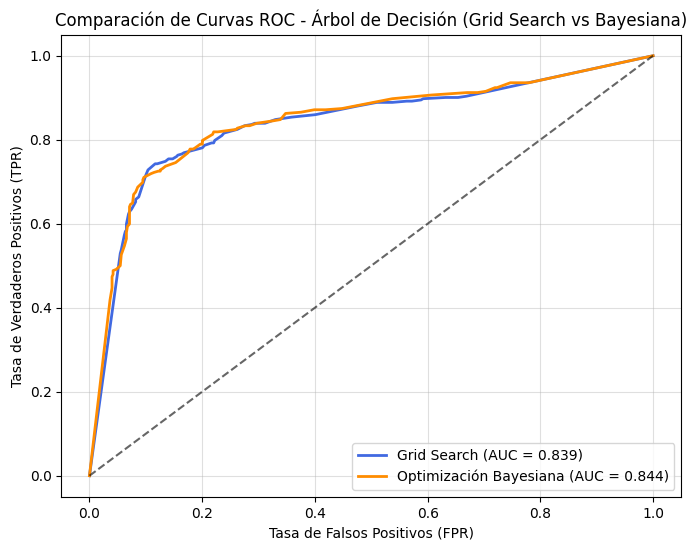

In [30]:
# ======================================================
# 📈 Comparación de Curvas ROC - Árbol de Decisión
# ======================================================

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades predichas para ambos modelos
y_proba_grid = cross_val_predict(best_tree, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
y_proba_bayes = cross_val_predict(best_bayes_tree, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]

# Calcular curvas ROC
fpr_grid, tpr_grid, _ = roc_curve(ytrain, y_proba_grid)
roc_auc_grid = auc(fpr_grid, tpr_grid)

fpr_bayes, tpr_bayes, _ = roc_curve(ytrain, y_proba_bayes)
roc_auc_bayes = auc(fpr_bayes, tpr_bayes)

# ------------------------------------------------------
# 🎨 Gráfico comparativo
# ------------------------------------------------------
plt.figure(figsize=(8,6))
plt.plot(fpr_grid, tpr_grid, label=f'Grid Search (AUC = {roc_auc_grid:.3f})', color='royalblue', linewidth=2)
plt.plot(fpr_bayes, tpr_bayes, label=f'Optimización Bayesiana (AUC = {roc_auc_bayes:.3f})', color='darkorange', linewidth=2)
plt.plot([0,1],[0,1],'k--',alpha=0.6)

plt.title("Comparación de Curvas ROC - Árbol de Decisión (Grid Search vs Bayesiana)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()




Fitting 5 folds for each of 96 candidates, totalling 480 fits
🏁 Mejores parámetros (Grid Search):
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
✅ Mejor accuracy promedio: 0.8473

📋 Reporte de Clasificación:
               precision    recall  f1-score   support

No sobrevivió       0.85      0.91      0.88       549
   Sobrevivió       0.84      0.74      0.79       342

     accuracy                           0.85       891
    macro avg       0.85      0.83      0.83       891
 weighted avg       0.85      0.85      0.85       891



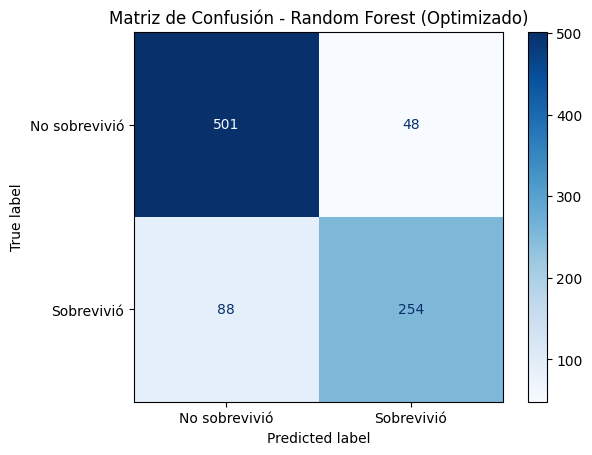

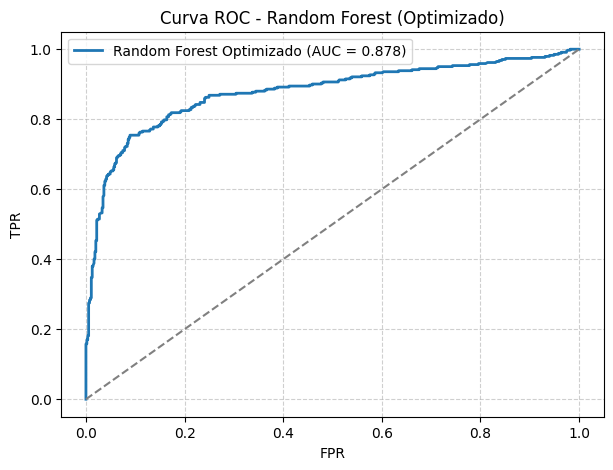

In [34]:
# ======================================================
# 🌲 Random Forest - Titanic (Optimizado)
# ======================================================

from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------
# 1️⃣ Escalado
# ------------------------------------------------------
sca_ = StandardScaler()
X_scaled = sca_.fit_transform(train)

# ------------------------------------------------------
# 2️⃣ Validación cruzada
# ------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # menos folds para acelerar

# ------------------------------------------------------
# 3️⃣ Random Forest base
# ------------------------------------------------------
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# ------------------------------------------------------
# 4️⃣ Malla de parámetros reducida
# ------------------------------------------------------
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# ------------------------------------------------------
# 5️⃣ Grid Search
# ------------------------------------------------------
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_scaled, ytrain)
best_rf_grid = grid_search.best_estimator_

print("🏁 Mejores parámetros (Grid Search):")
print(grid_search.best_params_)
print(f"✅ Mejor accuracy promedio: {grid_search.best_score_:.4f}")

# ------------------------------------------------------
# 6️⃣ Predicciones (una sola vez)
# ------------------------------------------------------
y_proba = cross_val_predict(best_rf_grid, X_scaled, ytrain, cv=cv, method='predict_proba')
y_pred = np.argmax(y_proba, axis=1)  # evita entrenar dos veces

# ------------------------------------------------------
# 7️⃣ Reporte de clasificación
# ------------------------------------------------------
print("\n📋 Reporte de Clasificación:")
print(classification_report(ytrain, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

# ------------------------------------------------------
# 8️⃣ Matriz de confusión
# ------------------------------------------------------
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"]).plot(cmap="Blues")
plt.title("Matriz de Confusión - Random Forest (Optimizado)")
plt.show()

# ------------------------------------------------------
# 9️⃣ Curva ROC
# ------------------------------------------------------
fpr, tpr, _ = roc_curve(ytrain, y_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Random Forest Optimizado (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("Curva ROC - Random Forest (Optimizado)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

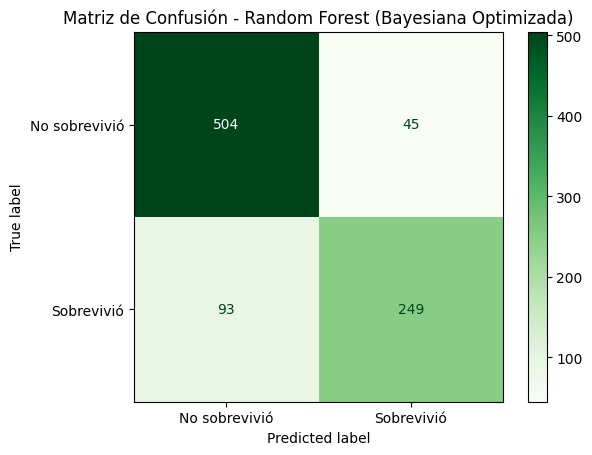

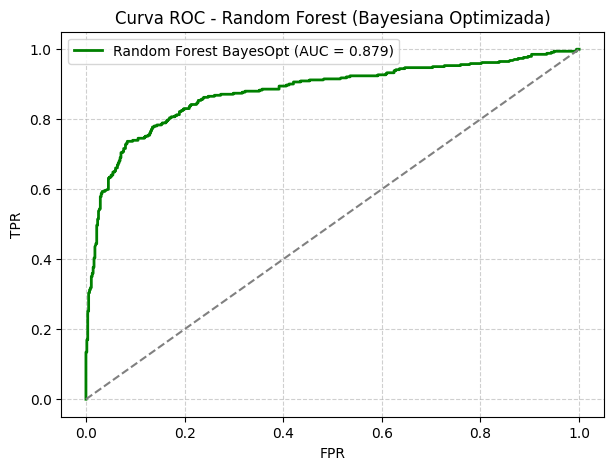

In [35]:
# ======================================================
# 🤖 Random Forest - Titanic (Bayesiana Optimizada)
# ======================================================

from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------
# 1️⃣ Espacio de búsqueda reducido
# ------------------------------------------------------
param_space = {
    'n_estimators': Integer(50, 200),           # rango más pequeño
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(5, 15),
    'min_samples_split': Integer(2, 8),
    'min_samples_leaf': Integer(1, 4),
    'max_features': Categorical(['sqrt', 'log2'])
}

# ------------------------------------------------------
# 2️⃣ BayesSearchCV
# ------------------------------------------------------
cv_bayes = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # menos folds para acelerar

bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    search_spaces=param_space,
    n_iter=20,       # menos iteraciones para acelerar
    cv=cv_bayes,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

bayes_search.fit(X_scaled, ytrain)
best_rf_bayes = bayes_search.best_estimator_

print("🏁 Mejores parámetros (Optimización Bayesiana):")
print(bayes_search.best_params_)
print(f"✅ Mejor accuracy promedio: {bayes_search.best_score_:.4f}")

# ------------------------------------------------------
# 3️⃣ Predicciones (una sola vez)
# ------------------------------------------------------
y_proba = cross_val_predict(best_rf_bayes, X_scaled, ytrain, cv=cv_bayes, method='predict_proba')
y_pred = np.argmax(y_proba, axis=1)

# ------------------------------------------------------
# 4️⃣ Reporte de clasificación
# ------------------------------------------------------
print("\n📋 Reporte de Clasificación:")
print(classification_report(ytrain, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))

# ------------------------------------------------------
# 5️⃣ Matriz de confusión
# ------------------------------------------------------
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"]).plot(cmap="Greens")
plt.title("Matriz de Confusión - Random Forest (Bayesiana Optimizada)")
plt.show()

# ------------------------------------------------------
# 6️⃣ Curva ROC
# ------------------------------------------------------
fpr, tpr, _ = roc_curve(ytrain, y_proba[:,1])
roc_auc_bayes = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Random Forest BayesOpt (AUC = {roc_auc_bayes:.3f})', linewidth=2, color='green')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("Curva ROC - Random Forest (Bayesiana Optimizada)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


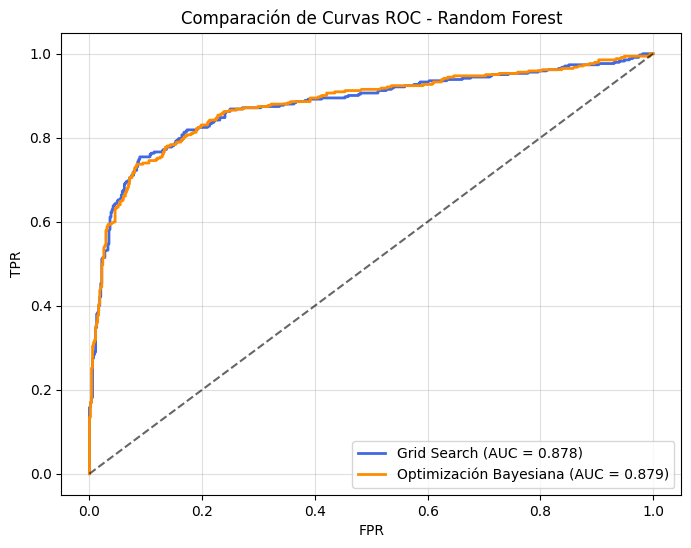

📊 COMPARACIÓN FINAL ENTRE MÉTODOS
Grid Search -> Mejor Accuracy Promedio: 0.8473 | AUC = 0.878
Bayesian Opt -> Mejor Accuracy Promedio: 0.8451 | AUC = 0.879

🏆 La Optimización Bayesiana logró mejor desempeño general.


In [38]:
# ======================================================
# 📈 Comparación de Curvas ROC - Random Forest
# ======================================================

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Probabilidades predichas
y_proba_grid = cross_val_predict(best_rf_grid, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
y_proba_bayes = cross_val_predict(best_rf_bayes, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]

# Curvas ROC
fpr_grid, tpr_grid, _ = roc_curve(ytrain, y_proba_grid)
roc_auc_grid = auc(fpr_grid, tpr_grid)

fpr_bayes, tpr_bayes, _ = roc_curve(ytrain, y_proba_bayes)
roc_auc_bayes = auc(fpr_bayes, tpr_bayes)

# Gráfico comparativo
plt.figure(figsize=(8,6))
plt.plot(fpr_grid, tpr_grid, label=f'Grid Search (AUC = {roc_auc_grid:.3f})', color='royalblue', linewidth=2)
plt.plot(fpr_bayes, tpr_bayes, label=f'Optimización Bayesiana (AUC = {roc_auc_bayes:.3f})', color='darkorange', linewidth=2)
plt.plot([0,1],[0,1],'k--',alpha=0.6)

plt.title("Comparación de Curvas ROC - Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

# Comparación numérica
print("==============================================")
print("📊 COMPARACIÓN FINAL ENTRE MÉTODOS")
print("==============================================")
print(f"Grid Search -> Mejor Accuracy Promedio: {grid_search.best_score_:.4f} | AUC = {roc_auc_grid:.3f}")
print(f"Bayesian Opt -> Mejor Accuracy Promedio: {bayes_search.best_score_:.4f} | AUC = {roc_auc_bayes:.3f}")

if roc_auc_bayes > roc_auc_grid:
    print("\n🏆 La Optimización Bayesiana logró mejor desempeño general.")
else:
    print("\n🏆 El Grid Search obtuvo mejor resultado o desempeño equivalente.")


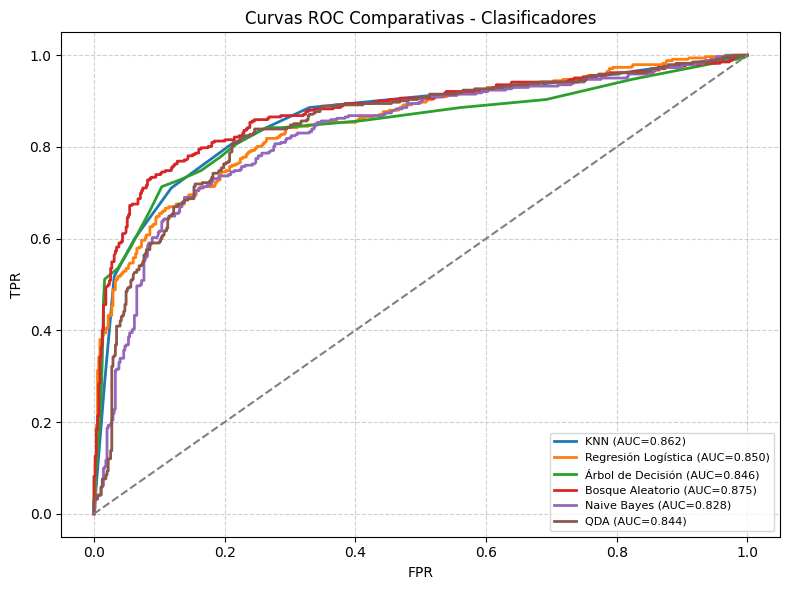


📊 Resultados comparativos (Grid Search + NB/QDA):
             Modelo                       Mejores Parámetros  Accuracy Promedio  Desv Std      AUC
   Bosque Aleatorio   {'max_depth': 10, 'n_estimators': 100}           0.839489  0.014206 0.875300
                KNN {'n_neighbors': 7, 'weights': 'uniform'}           0.815900  0.018896 0.862003
Regresión Logística                              {'C': 0.01}           0.803584  0.015571 0.850054
  Árbol de Decisión    {'criterion': 'gini', 'max_depth': 3}           0.826025  0.015623 0.845756
                QDA                                      N/A           0.789009  0.009609 0.843908
        Naive Bayes                                      N/A           0.782292  0.016822 0.828095


In [41]:
# ======================================================
# 🤖 Comparación de Clasificadores (Grid Search + NB/QDA) - Titanic
# ======================================================

from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ------------------------------------------------------
# 1️⃣ Escalado de características
# ------------------------------------------------------
sca_ = StandardScaler()
X_scaled = sca_.fit_transform(train)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------------------------------
# 2️⃣ Modelos y grids
# ------------------------------------------------------
grids = {
    "KNN": (KNeighborsClassifier(),
            {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}),
    "Regresión Logística": (LogisticRegression(max_iter=1000, random_state=42),
                            {"C": [0.01, 0.1, 1, 10, 100]}),
    "Árbol de Decisión": (DecisionTreeClassifier(random_state=42),
                          {"criterion": ["gini", "entropy"], "max_depth": [3, 5, 10, None]}),
    "Bosque Aleatorio": (RandomForestClassifier(random_state=42, n_jobs=-1),
                         {"n_estimators": [100, 200], "max_depth": [None, 5, 10]})
}

# Modelos sin Grid Search
no_grid_models = {
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# ------------------------------------------------------
# 3️⃣ Entrenamiento + Validación cruzada + ROC
# ------------------------------------------------------
resultados = []
plt.figure(figsize=(8,6))

# Modelos con Grid Search
for name, (model, param_grid) in grids.items():
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_scaled, ytrain)
    best_model = grid.best_estimator_
    
    y_proba = cross_val_predict(best_model, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
    acc_scores = cross_val_score(best_model, X_scaled, ytrain, cv=cv, scoring='accuracy')
    fpr, tpr, _ = roc_curve(ytrain, y_proba)
    roc_auc = auc(fpr, tpr)

    resultados.append({
        "Modelo": name,
        "Mejores Parámetros": grid.best_params_,
        "Accuracy Promedio": np.mean(acc_scores),
        "Desv Std": np.std(acc_scores),
        "AUC": roc_auc
    })

    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.3f})")

# Modelos sin Grid Search
for name, model in no_grid_models.items():
    y_proba = cross_val_predict(model, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
    acc_scores = cross_val_score(model, X_scaled, ytrain, cv=cv, scoring='accuracy')
    fpr, tpr, _ = roc_curve(ytrain, y_proba)
    roc_auc = auc(fpr, tpr)

    resultados.append({
        "Modelo": name,
        "Mejores Parámetros": "N/A",
        "Accuracy Promedio": np.mean(acc_scores),
        "Desv Std": np.std(acc_scores),
        "AUC": roc_auc
    })

    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.3f})")

# ------------------------------------------------------
# Gráfico final
# ------------------------------------------------------
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("Curvas ROC Comparativas - Clasificadores")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# Resultados comparativos
# ------------------------------------------------------
df_res_grid = pd.DataFrame(resultados).sort_values(by="AUC", ascending=False)
print("\n📊 Resultados comparativos (Grid Search + NB/QDA):")
print(df_res_grid.to_string(index=False))


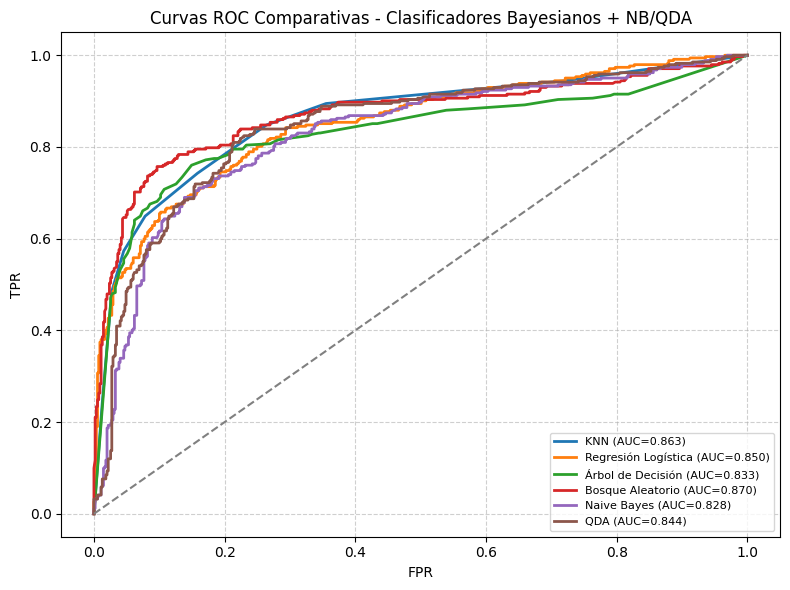


📊 Resultados comparativos (Optimización Bayesiana + NB/QDA):
             Modelo                       Mejores Parámetros  Accuracy Promedio  Desv Std      AUC
   Bosque Aleatorio     {'max_depth': 9, 'n_estimators': 50}           0.845101  0.018107 0.870472
                KNN {'n_neighbors': 8, 'weights': 'uniform'}           0.817074  0.013828 0.863311
Regresión Logística              {'C': 0.009161792285588501}           0.805831  0.014960 0.849974
                QDA                                      N/A           0.789009  0.009609 0.843908
  Árbol de Decisión    {'criterion': 'gini', 'max_depth': 7}           0.821549  0.016808 0.833477
        Naive Bayes                                      N/A           0.782292  0.016822 0.828095


In [42]:
# ======================================================
# 🤖 Comparación de Clasificadores (Optimización Bayesiana + NB/QDA) - Titanic
# ======================================================

from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------
# 1️⃣ Escalado
# ------------------------------------------------------
sca_ = StandardScaler()
X_scaled = sca_.fit_transform(train)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------------------------------
# 2️⃣ Espacios de búsqueda para Bayes
# ------------------------------------------------------
search_spaces = {
    "KNN": (KNeighborsClassifier(),
            {"n_neighbors": Integer(3, 10),
             "weights": Categorical(["uniform", "distance"])}),

    "Regresión Logística": (LogisticRegression(max_iter=1000, random_state=42),
            {"C": Real(1e-3, 1e3, prior="log-uniform")}),

    "Árbol de Decisión": (DecisionTreeClassifier(random_state=42),
            {"max_depth": Integer(2, 20),
             "criterion": Categorical(["gini", "entropy"])}),

    "Bosque Aleatorio": (RandomForestClassifier(random_state=42, n_jobs=-1),
            {"n_estimators": Integer(50, 300),
             "max_depth": Integer(3, 20)})
}

# Modelos sin BayesSearch (NB y QDA)
no_search_models = {
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# ------------------------------------------------------
# 3️⃣ Entrenamiento + Validación cruzada + ROC
# ------------------------------------------------------
resultados = []
plt.figure(figsize=(8,6))

# Modelos con BayesSearchCV
for name, (model, search_space) in search_spaces.items():
    opt = BayesSearchCV(model, search_space, n_iter=20, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42)
    opt.fit(X_scaled, ytrain)
    best_model = opt.best_estimator_

    y_proba = cross_val_predict(best_model, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
    acc_scores = cross_val_score(best_model, X_scaled, ytrain, cv=cv, scoring='accuracy')
    fpr, tpr, _ = roc_curve(ytrain, y_proba)
    roc_auc = auc(fpr, tpr)

    resultados.append({
        "Modelo": name,
        "Mejores Parámetros": opt.best_params_,
        "Accuracy Promedio": np.mean(acc_scores),
        "Desv Std": np.std(acc_scores),
        "AUC": roc_auc
    })

    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.3f})")

# Modelos sin BayesSearch (NB y QDA)
for name, model in no_search_models.items():
    y_proba = cross_val_predict(model, X_scaled, ytrain, cv=cv, method='predict_proba')[:, 1]
    acc_scores = cross_val_score(model, X_scaled, ytrain, cv=cv, scoring='accuracy')
    fpr, tpr, _ = roc_curve(ytrain, y_proba)
    roc_auc = auc(fpr, tpr)

    resultados.append({
        "Modelo": name,
        "Mejores Parámetros": "N/A",
        "Accuracy Promedio": np.mean(acc_scores),
        "Desv Std": np.std(acc_scores),
        "AUC": roc_auc
    })

    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.3f})")

# ------------------------------------------------------
# Gráfico final
# ------------------------------------------------------
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("Curvas ROC Comparativas - Clasificadores Bayesianos + NB/QDA")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# Resultados comparativos
# ------------------------------------------------------
df_res_bayes = pd.DataFrame(resultados).sort_values(by="AUC", ascending=False)
print("\n📊 Resultados comparativos (Optimización Bayesiana + NB/QDA):")
print(df_res_bayes.to_string(index=False))
